In [1]:
import os

from gnssrefl.utils import check_environment, set_environment, get_sys
from pathlib import Path

# Making sure environment variables are set - this is required to run the gnssrefl code
notebook_dir = Path.cwd().parents[0]

exists = check_environment()
if exists == False:
    #If you are running this locally - make sure the items in the exe folder have execution permissions
    set_environment(refl_code=str(notebook_dir),
                    orbits=str(notebook_dir / "orbits"),
                    exe=str(notebook_dir / "exe"))

# Set local variable of refl_code location
refl_code_loc = os.environ['REFL_CODE']
print("refl_code location:", refl_code_loc)

# import gnssrefl functions
from gnssrefl.rinex2snr_cl import rinex2snr
from gnssrefl.nmea2snr_cl import nmea2snr
from gnssrefl.quickLook_cl import quicklook
from gnssrefl.installexe_cl import installexe
from gnssrefl.gnssir_cl import gnssir
from gnssrefl.daily_avg_cl import daily_avg
from gnssrefl.vwc_cl import vwc

%matplotlib inline

refl_code location: /etc/gnssrefl/refl_code


In [2]:
# import the crx2rnx file which is dependent on your working OS - this is required to run the gnssrefl code
try:
    os.environ['DOCKER']
except KeyError:
    sys = get_sys()
    installexe(sys)

In [4]:
nmea2snr?

Signature:
nmea2snr(
    station: str,
    year: int,
    doy: int,
    snr: int = 66,
    year_end: int = None,
    doy_end: int = None,
    overwrite: bool = False,
    dec: int = 1,
    lat: float = None,
    lon: float = None,
    height: float = None,
    risky: bool = False,
    gzip: bool = True,
    par: int = None,
    orb: str = None,
    hour: int = 0,
    debug: bool = None,
)
Docstring:
This code creates SNR files from NMEA files.  

The NMEA files should be stored in $REFL_CODE/nmea/ssss/2023 for station ssss and year 2023
or $REFL_CODE/nmea/SSSS/2023 for station SSSS. The NMEA files should be named 
SSSS1520.23.A or ssss1520.23.A, where the day of year is 152 and year is 2023 in this example.

The SNR files created are stored with upper case if given upper case, lower case if given lower case.
Currently I have left the last character in the file name as it was given to me - capital A.
If this should be lower case for people that use lowercase station names, please let me

In [4]:
station = 'fiel'
year = 2025
doy=140
doy_end=145

# nmea2snr(station, year, doy, doy_end=doy_end, lat=-44.71658583, lon=169.17848417, height=4.5)

In [10]:
quicklook?

Signature:
quicklook(
    station: str,
    year: int,
    doy: int,
    snr: int = 66,
    fr: int = 1,
    ampl: float = 7.0,
    e1: float = 5,
    e2: float = 25,
    h1: float = 0.5,
    h2: float = 8.0,
    sat: int = None,
    peak2noise: float = 3.0,
    screenstats: bool = False,
    fortran: bool = None,
    plt: bool = True,
    azim1: float = 0.0,
    azim2: float = 360.0,
    ediff: float = 2.0,
    delTmax: float = 75.0,
    hires_figs: bool = False,
)
Docstring:
quickLook assessment of GNSS-IR results using SNR data. It creates two plots: one with periodograms for
four different quadrants (northwest, northeast, southeast, southwest) and the other with the RH
results shown as a function of azimuth. This plot also summarizes why the RH retrievals were accepted
or rejected in terms of the quality control parameters.  

Examples
--------
quickLook p041 2023 1 
    analyzes station p041 on day of year 1 in the year 2023 with defaults (L1, e1=5, e2=25)

quickLook p041 2023 1 -

Did not find station coordinates : fiel
Although no station coordinates were found, this is ok for quickLook.
minimum elevation angle (degrees) for this dataset:  0.0002
Plot saved to  /etc/gnssrefl/refl_code/Files/fiel/quickLook_lsp.png
Plot saved to  /etc/gnssrefl/refl_code/Files/fiel/quickLook_summary.png


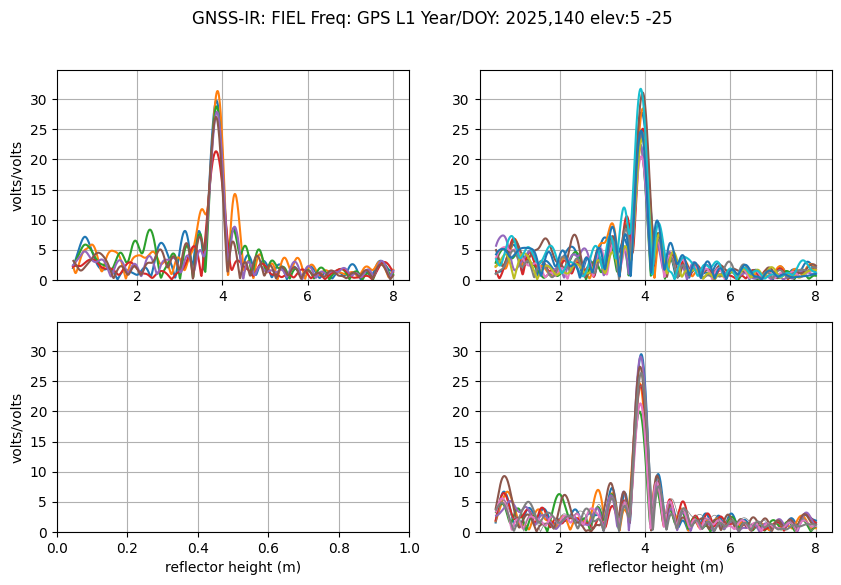

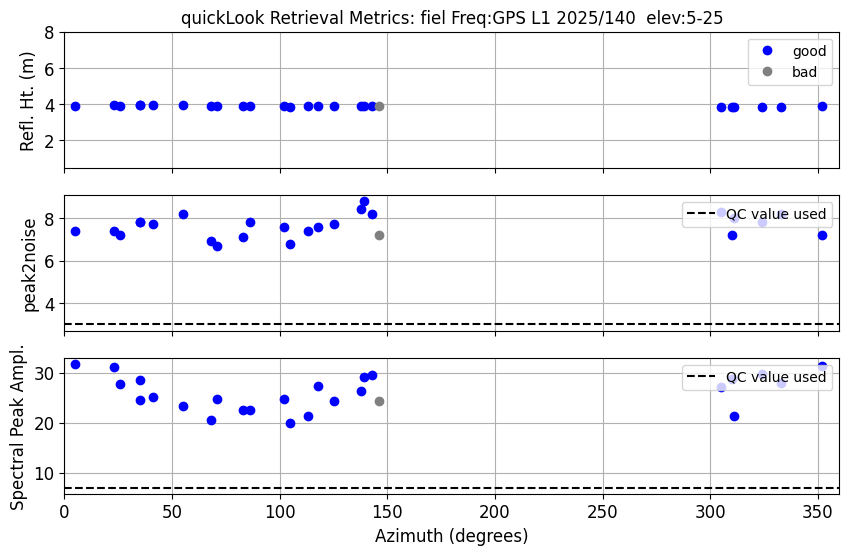

In [5]:
values, metrics = quicklook(station, year, doy=140, plt=True)

In [8]:
gnssir?

Signature:
gnssir(
    station: str,
    year: int,
    doy: int,
    snr: int = 66,
    plt: bool = False,
    fr: list = [],
    ampl: float = None,
    sat: int = None,
    doy_end: int = None,
    year_end: int = None,
    azim1: int = 0,
    azim2: int = 360,
    nooverwrite: bool = False,
    extension: str = '',
    compress: bool = False,
    screenstats: bool = True,
    delTmax: int = None,
    e1: float = None,
    e2: float = None,
    mmdd: bool = False,
    gzip: bool = True,
    dec: int = 1,
    savearcs: bool = False,
    savearcs_format: str = 'txt',
    par: int = None,
    debug: bool = False,
)
Docstring:
gnssir is the main driver for estimating reflector heights. The user is required to 
have set up an analysis strategy using gnssir_input. 

screenstats is always True now - and the information is written to a file. I have kept the optional parameter
for backwards compatability, but it does not do anything.

Parallel processing is now available. If you set -par to 

Using these instructions  /etc/gnssrefl/refl_code/input/fiel.json
Using snr file type:  66
[5, 30]  direct signal elevation angle limits
Requested frequencies  [1, 20, 5]
Parallel processing not requested
refraction model 1
LSP Results will be written to: /etc/gnssrefl/refl_code/2025/results/fiel//140.txt
Refraction parameters (pressure, temp, humidity, ModelNum) 1013.335 12.1 11.811 1
Reading SNR data from:  /etc/gnssrefl/refl_code/2025/snr/fiel/fiel1400.25.snr66
Min observed elev. angle 0.0002 for fiel 2025:140/ Requested e1-e2: of 5.0-25.0
Standard Bennett refraction correction
data found for this frequency:  1
/etc/gnssrefl/refl_code/Files/fiel/gnssir_freq001.png
Plot file saved as:  /etc/gnssrefl/refl_code/Files/fiel/gnssir_freq001.png


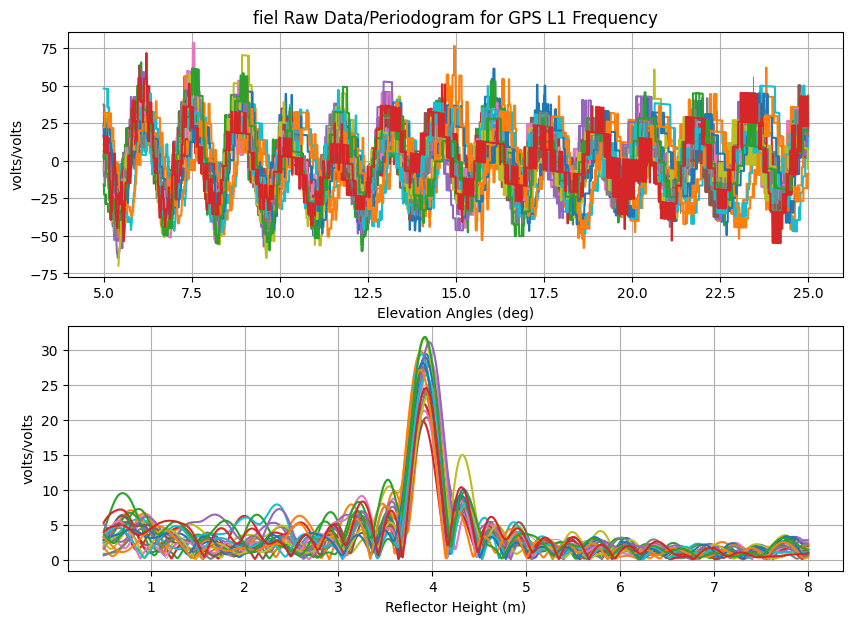

data found for this frequency:  20
/etc/gnssrefl/refl_code/Files/fiel/gnssir_freq020.png
Plot file saved as:  /etc/gnssrefl/refl_code/Files/fiel/gnssir_freq020.png


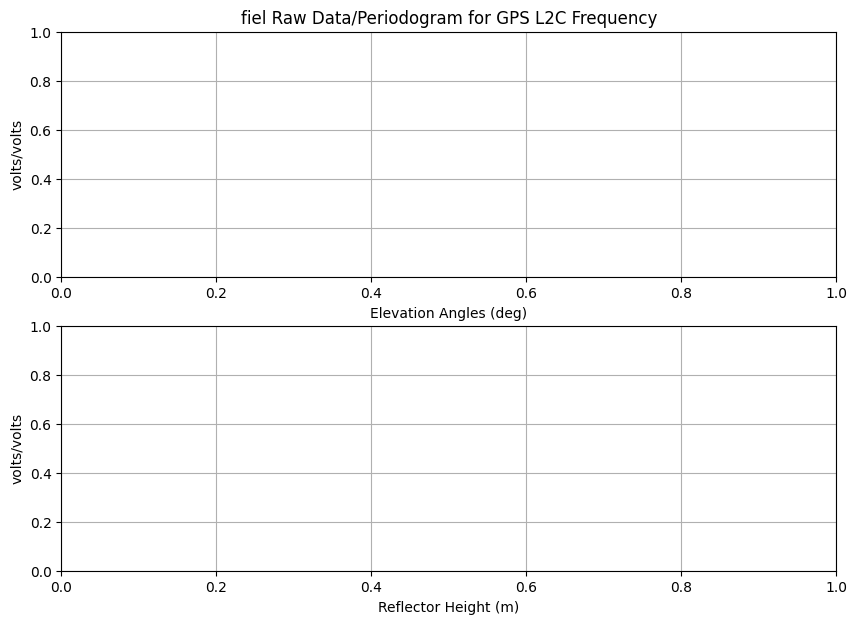

data found for this frequency:  5
/etc/gnssrefl/refl_code/Files/fiel/gnssir_freq005.png
Plot file saved as:  /etc/gnssrefl/refl_code/Files/fiel/gnssir_freq005.png


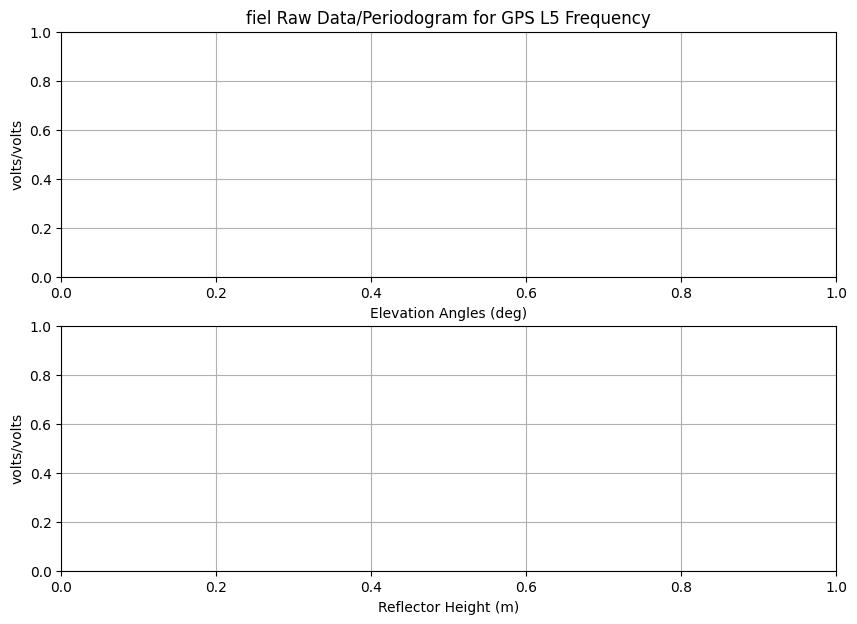

Screen stat information printed to:  /etc/gnssrefl/refl_code/logs/fiel/2025/140_gnssir.txt
Writing sorted LSP results to :  /etc/gnssrefl/refl_code/2025/results/fiel//140.txt 

refraction model 1
LSP Results will be written to: /etc/gnssrefl/refl_code/2025/results/fiel//141.txt
Refraction parameters (pressure, temp, humidity, ModelNum) 1013.335 12.1 11.811 1
Reading SNR data from:  /etc/gnssrefl/refl_code/2025/snr/fiel/fiel1410.25.snr66
Min observed elev. angle 0.0001 for fiel 2025:141/ Requested e1-e2: of 5.0-25.0
Standard Bennett refraction correction
data found for this frequency:  1
/etc/gnssrefl/refl_code/Files/fiel/gnssir_freq001.png
Plot file saved as:  /etc/gnssrefl/refl_code/Files/fiel/gnssir_freq001.png


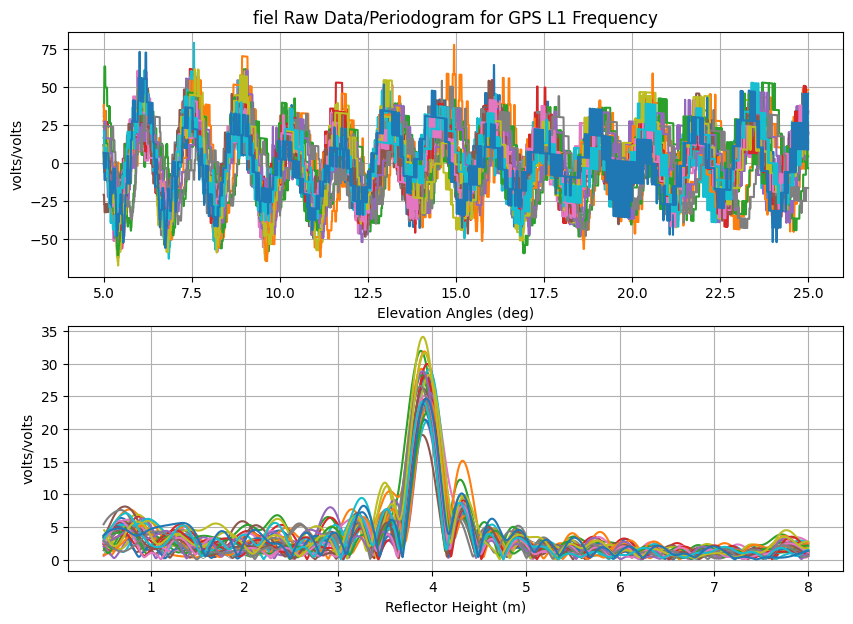

data found for this frequency:  20
/etc/gnssrefl/refl_code/Files/fiel/gnssir_freq020.png
Plot file saved as:  /etc/gnssrefl/refl_code/Files/fiel/gnssir_freq020.png


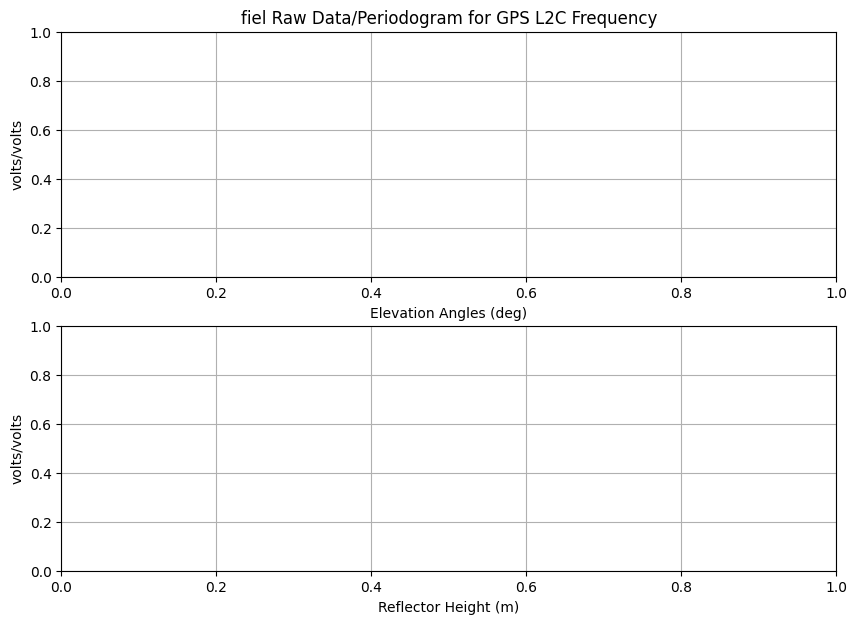

data found for this frequency:  5
/etc/gnssrefl/refl_code/Files/fiel/gnssir_freq005.png
Plot file saved as:  /etc/gnssrefl/refl_code/Files/fiel/gnssir_freq005.png


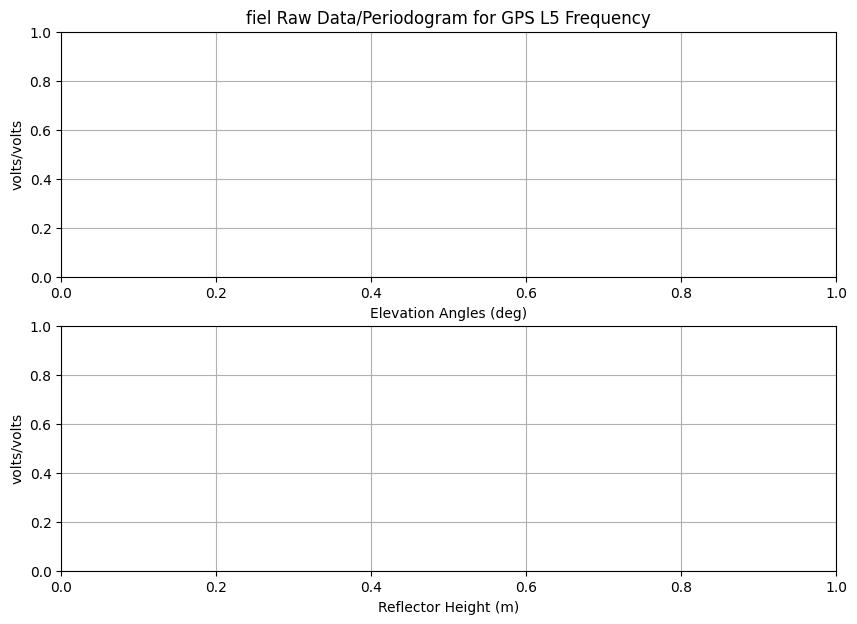

Screen stat information printed to:  /etc/gnssrefl/refl_code/logs/fiel/2025/141_gnssir.txt
Writing sorted LSP results to :  /etc/gnssrefl/refl_code/2025/results/fiel//141.txt 

refraction model 1
LSP Results will be written to: /etc/gnssrefl/refl_code/2025/results/fiel//142.txt
Refraction parameters (pressure, temp, humidity, ModelNum) 1013.335 12.1 11.811 1
Reading SNR data from:  /etc/gnssrefl/refl_code/2025/snr/fiel/fiel1420.25.snr66
Min observed elev. angle 0.0003 for fiel 2025:142/ Requested e1-e2: of 5.0-25.0
Standard Bennett refraction correction
data found for this frequency:  1
/etc/gnssrefl/refl_code/Files/fiel/gnssir_freq001.png
Plot file saved as:  /etc/gnssrefl/refl_code/Files/fiel/gnssir_freq001.png


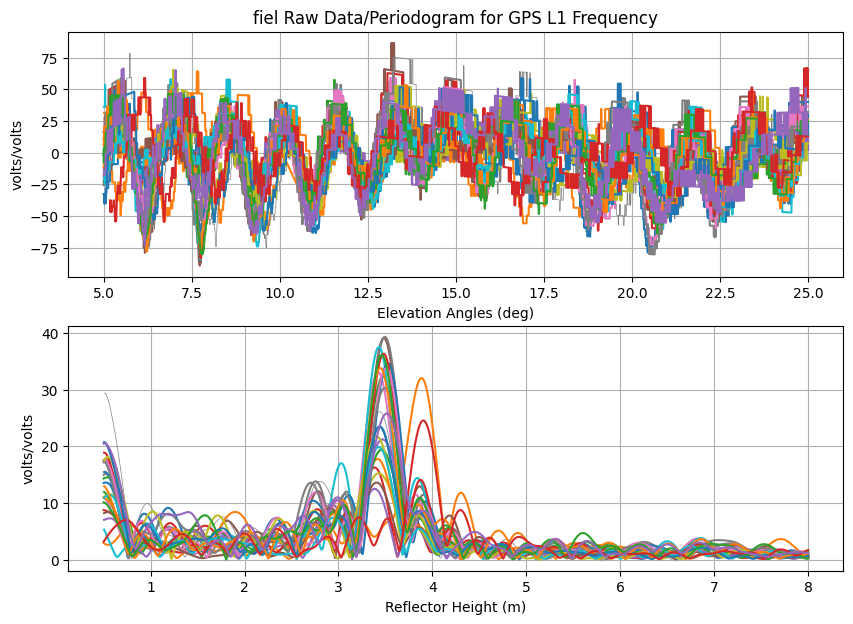

data found for this frequency:  20
/etc/gnssrefl/refl_code/Files/fiel/gnssir_freq020.png
Plot file saved as:  /etc/gnssrefl/refl_code/Files/fiel/gnssir_freq020.png


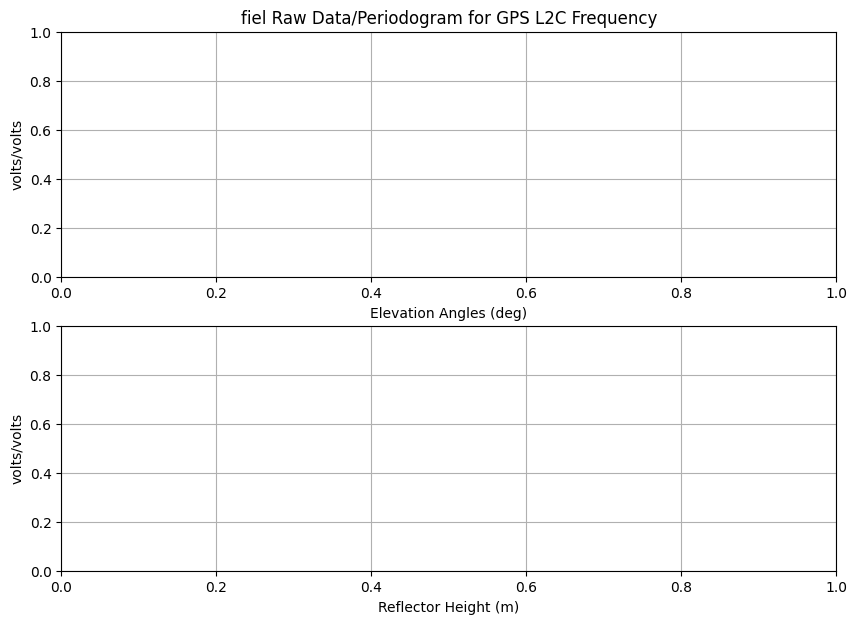

data found for this frequency:  5
/etc/gnssrefl/refl_code/Files/fiel/gnssir_freq005.png
Plot file saved as:  /etc/gnssrefl/refl_code/Files/fiel/gnssir_freq005.png


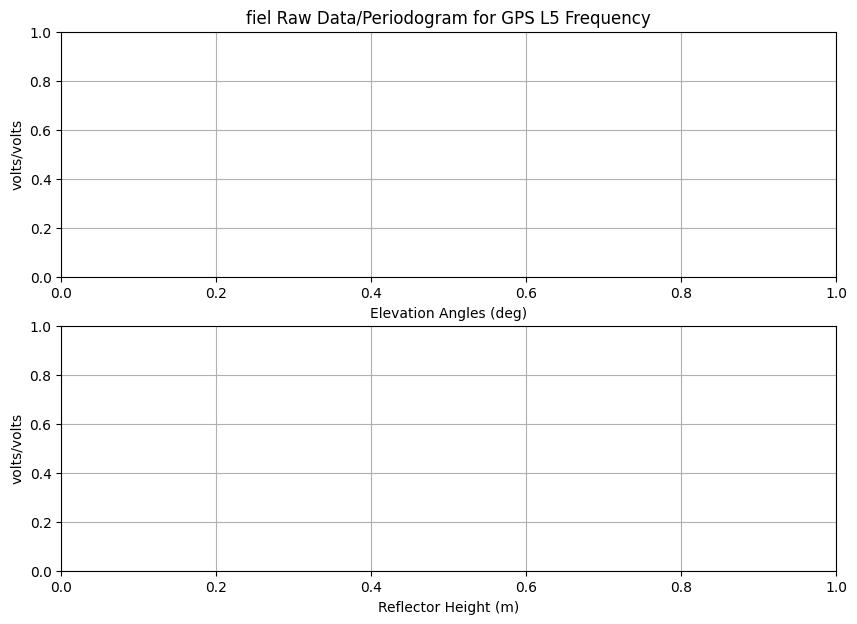

Screen stat information printed to:  /etc/gnssrefl/refl_code/logs/fiel/2025/142_gnssir.txt
Writing sorted LSP results to :  /etc/gnssrefl/refl_code/2025/results/fiel//142.txt 

refraction model 1
LSP Results will be written to: /etc/gnssrefl/refl_code/2025/results/fiel//143.txt
Refraction parameters (pressure, temp, humidity, ModelNum) 1013.335 12.1 11.811 1
Reading SNR data from:  /etc/gnssrefl/refl_code/2025/snr/fiel/fiel1430.25.snr66
Min observed elev. angle 0.0001 for fiel 2025:143/ Requested e1-e2: of 5.0-25.0
Standard Bennett refraction correction
data found for this frequency:  1
/etc/gnssrefl/refl_code/Files/fiel/gnssir_freq001.png
Plot file saved as:  /etc/gnssrefl/refl_code/Files/fiel/gnssir_freq001.png


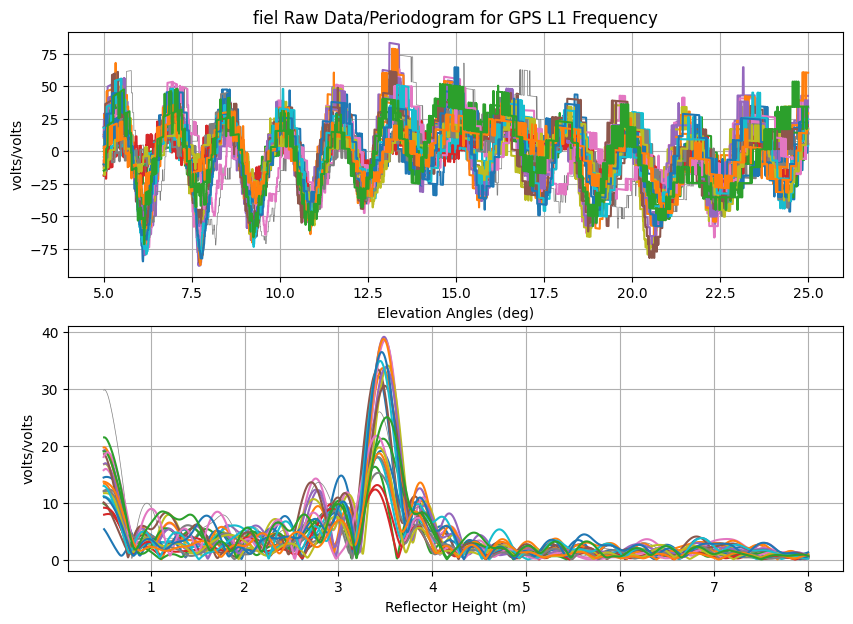

data found for this frequency:  20
/etc/gnssrefl/refl_code/Files/fiel/gnssir_freq020.png
Plot file saved as:  /etc/gnssrefl/refl_code/Files/fiel/gnssir_freq020.png


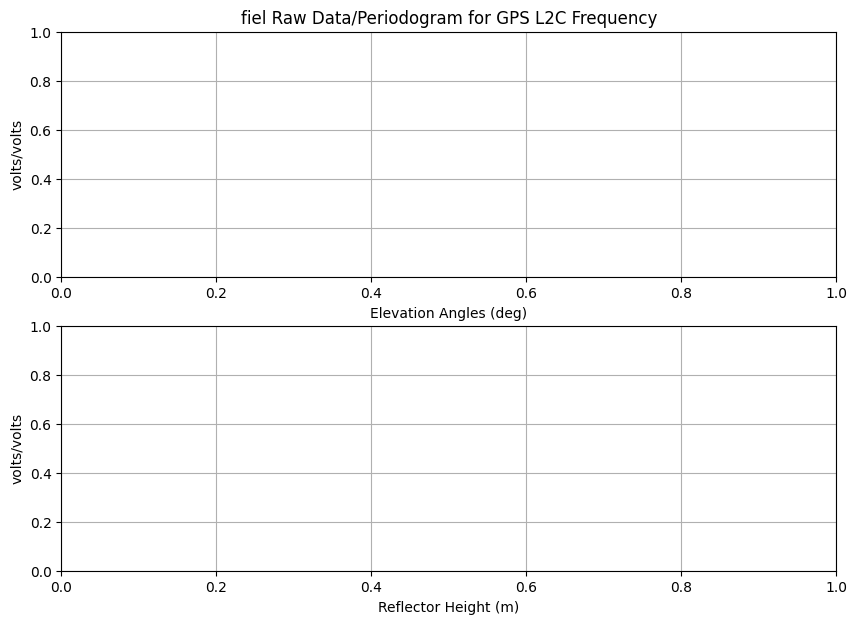

data found for this frequency:  5
/etc/gnssrefl/refl_code/Files/fiel/gnssir_freq005.png
Plot file saved as:  /etc/gnssrefl/refl_code/Files/fiel/gnssir_freq005.png


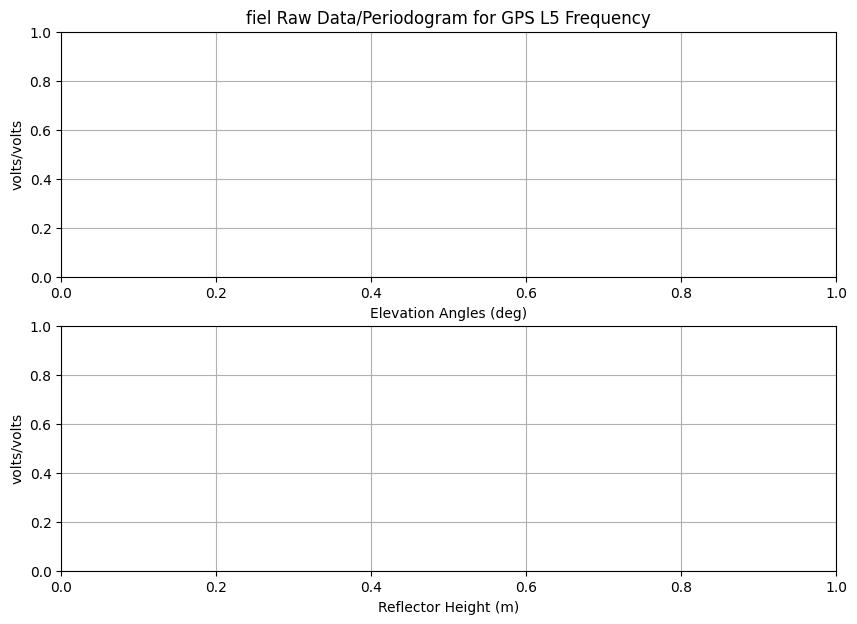

Screen stat information printed to:  /etc/gnssrefl/refl_code/logs/fiel/2025/143_gnssir.txt
Writing sorted LSP results to :  /etc/gnssrefl/refl_code/2025/results/fiel//143.txt 

refraction model 1
LSP Results will be written to: /etc/gnssrefl/refl_code/2025/results/fiel//144.txt
Refraction parameters (pressure, temp, humidity, ModelNum) 1013.335 12.1 11.811 1
Reading SNR data from:  /etc/gnssrefl/refl_code/2025/snr/fiel/fiel1440.25.snr66
Min observed elev. angle 0.0001 for fiel 2025:144/ Requested e1-e2: of 5.0-25.0
Standard Bennett refraction correction
data found for this frequency:  1
/etc/gnssrefl/refl_code/Files/fiel/gnssir_freq001.png
Plot file saved as:  /etc/gnssrefl/refl_code/Files/fiel/gnssir_freq001.png


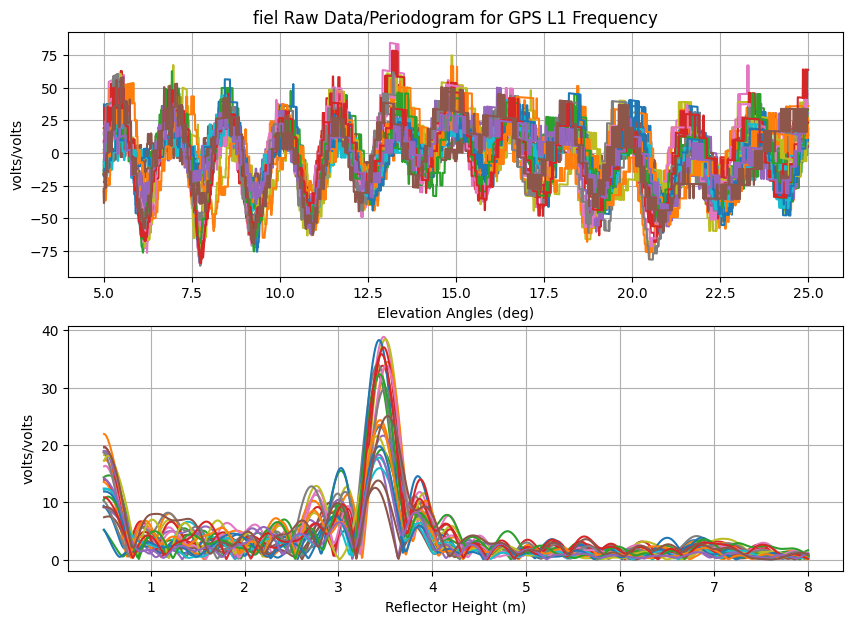

data found for this frequency:  20
/etc/gnssrefl/refl_code/Files/fiel/gnssir_freq020.png
Plot file saved as:  /etc/gnssrefl/refl_code/Files/fiel/gnssir_freq020.png


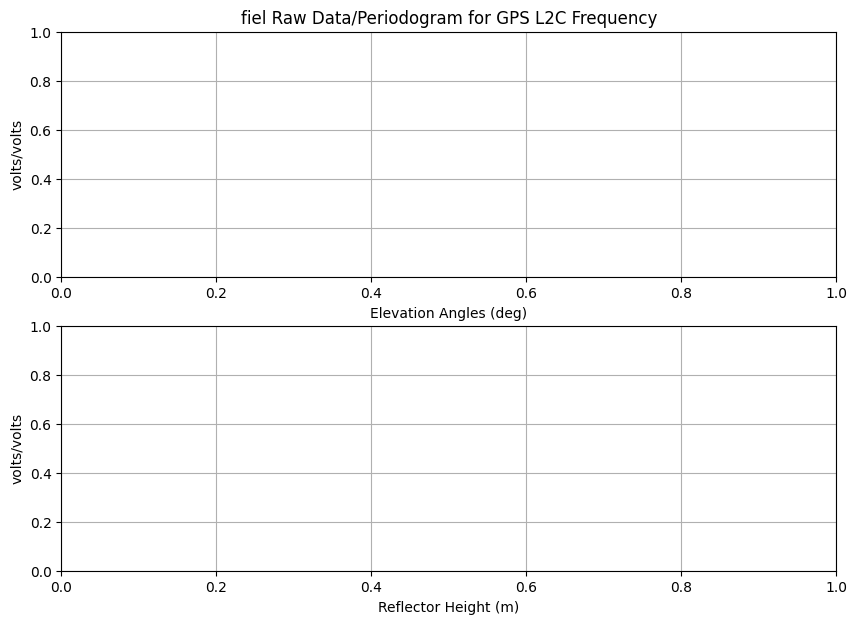

data found for this frequency:  5
/etc/gnssrefl/refl_code/Files/fiel/gnssir_freq005.png
Plot file saved as:  /etc/gnssrefl/refl_code/Files/fiel/gnssir_freq005.png


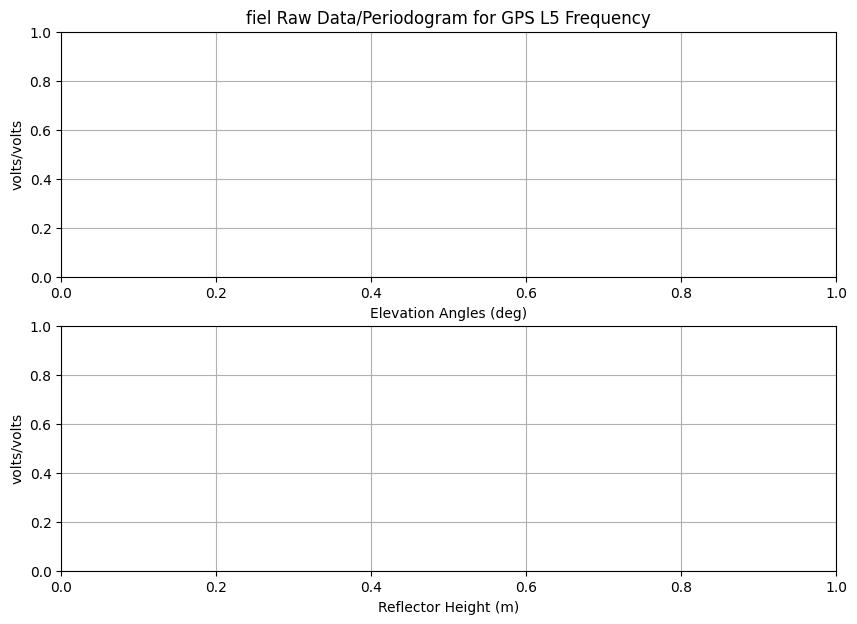

Screen stat information printed to:  /etc/gnssrefl/refl_code/logs/fiel/2025/144_gnssir.txt
Writing sorted LSP results to :  /etc/gnssrefl/refl_code/2025/results/fiel//144.txt 

refraction model 1
LSP Results will be written to: /etc/gnssrefl/refl_code/2025/results/fiel//145.txt
Refraction parameters (pressure, temp, humidity, ModelNum) 1013.335 12.1 11.811 1
***********************************************************************
Try using -debug T to get better information about why the code crashed:   2025 145
***********************************************************************
Time to compute:  69.19  seconds


/usr/local/lib/python3.10/site-packages/gnssrefl/gnssir_v2.py:934: UserWarning: genfromtxt: Empty input file: "/etc/gnssrefl/refl_code/2025/snr/fiel/fiel1450.25.snr66"
  f = np.genfromtxt(obsfile,comments='%')


In [7]:
gnssir(station, year, doy, doy_end=doy_end, plt=True)

In [8]:
daily_avg?

Signature:
daily_avg(
    station: str,
    medfilter: float,
    ReqTracks: int,
    txtfile: str = None,
    plt: bool = True,
    extension: str = '',
    year1: int = None,
    year2: int = None,
    fr: int = 0,
    csv: bool = False,
    azim1: int = 0,
    azim2: int = 360,
    test: bool = False,
    subdir: str = None,
    plot_limits: bool = False,
    date1: str = None,
    date2: str = None,
)
Docstring:
The goal of this code is to consolidate individual RH results into a single file consisting of 
daily averaged RH without outliers. These daily average values are nominally associated 
with the time of 12 hours UTC.


There are two required parameters - medfilter and ReqTracks. These are quality control parameters.
They are applied in two steps. The code first calculates the median value each day - and keeps
only the RH that are within medfilter (meters) of this median value. If there are at least "ReqTracks"
number of RH left after that step, a daily average is computed fo

Using these instructions  /etc/gnssrefl/refl_code/input/fiel.json
Median Filter 0.25  Required number of tracks/day  10
All RH retrievals - including bad ones - will be written to: 
/etc/gnssrefl/refl_code/Files/fiel/fiel_allRH.txt.noqc 

All RH retrievals that meet your median filter and ReqTracks criteria will be written to: 
/etc/gnssrefl/refl_code/Files/fiel/fiel_allRH.txt 

A total of  5  days were evaluated.
0  days did not meet the threshold set for a dependable daily average
All RH png file saved as:  /etc/gnssrefl/refl_code/Files/fiel/fiel_AllRH.png
All RH png file without QC saved as:  /etc/gnssrefl/refl_code/Files/fiel/fiel_AllRH_noQC.png
Daily average RH png file saved as:  /etc/gnssrefl/refl_code/Files/fiel/fiel_RH.png
Daily average RH amplitude file saved as:  /etc/gnssrefl/refl_code/Files/fiel/fiel_RHamp.png
Number of values used in average RH file saved as:  /etc/gnssrefl/refl_code/Files/fiel/fiel_nvals.png


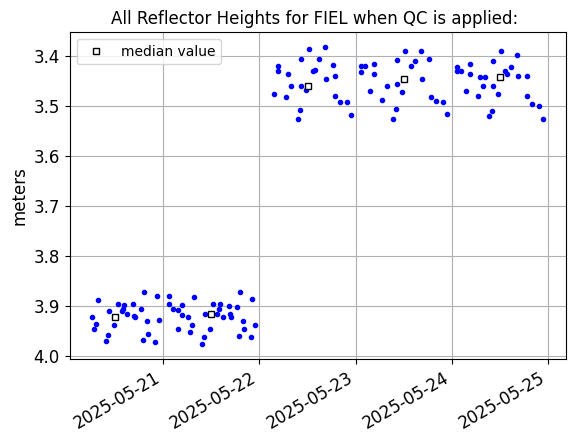

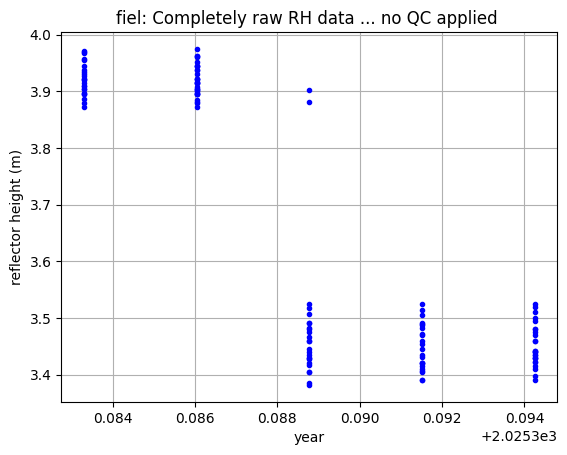

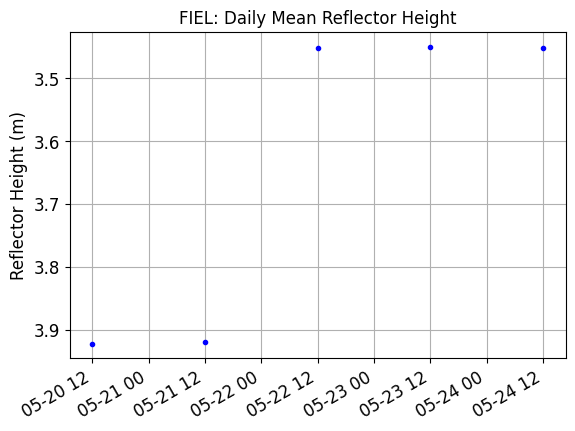

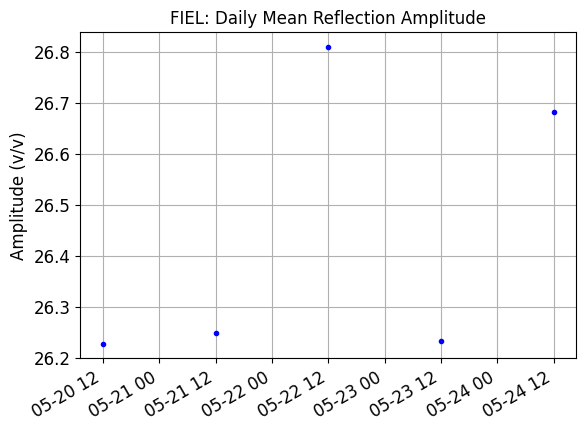

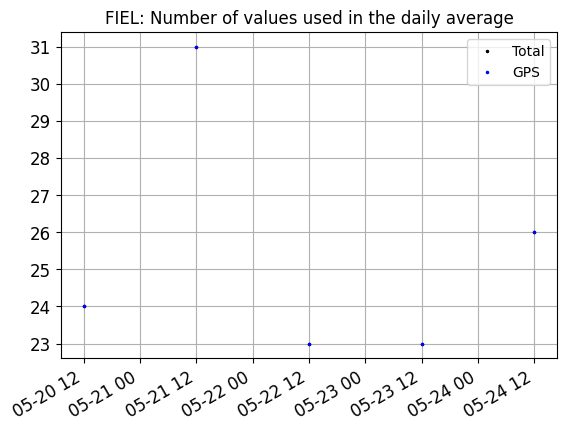

Using these instructions  /etc/gnssrefl/refl_code/input/fiel.json

Daily average RH file written to:  /etc/gnssrefl/refl_code/Files/fiel/fiel_dailyRH.txt


In [9]:
daily_avg('fiel', 0.25, 10)

In [12]:
vwc?

Signature:
vwc(
    station: str,
    year: int,
    year_end: int = None,
    fr: int = 20,
    plt: bool = True,
    screenstats: bool = False,
    min_req_pts_track: int = None,
    polyorder: int = -99,
    minvalperday: int = None,
    snow_filter: bool = False,
    subdir: str = None,
    tmin: float = None,
    tmax: float = None,
    warning_value: float = None,
    auto_removal: bool = False,
    hires_figs: bool = False,
    advanced: bool = False,
    extension: str = None,
)
Docstring:
The goal of this code is to compute volumetric water content (VWC) from GNSS-IR phase estimates. 
It concatenates previously computed phase results, makes plots for the four geographic quadrants, computes daily 
average phase files before converting to volumetric water content (VWC). It uses the simple vegetation model
from Clara Chew's dissertation. For the more advanced vegetation model, we will need a volumteer to convert it from Matlab.
It is not a difficult port - but it will require car

In [6]:
vwc('fiel', 2025)

Using these instructions  /etc/gnssrefl/refl_code/input/fiel.json
minvalperday 10
tmin/tmax 0.05 0.5
min_req_tracks 100
warning value 5.5
extension value None
WARNING The average phase file used from a previous run for QC does not exist as yet
Requested frequency:  20
reading in year 2025
No results were found for the year range you requested: (2025-2025)


SystemExit: 

/usr/local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3587: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
